   Seed_Weight  Germination_Rate  Moisture_Level  Temperature Seed_Type
0        31.97             88.41           16.43        19.90     Wheat
1        40.65             72.57           17.50        18.52    Millet
2        57.15             78.85           11.61        30.56      Rice
3        22.03             92.87            9.53        34.53     Wheat
4        16.08             78.37            8.89        29.46     Wheat

--- Metrics (Multiclass) ---
Accuracy: 0.175
Precision: 0.21587144702842373
Recall: 0.175
F1 Score: 0.17821662413028286


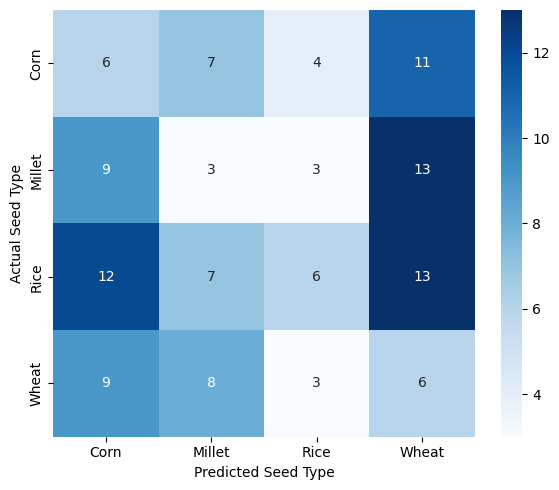

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

df = pd.read_csv("seed_prediction_dataset.csv")
print(df.head())

# Define numeric columns
cols = ["Seed_Weight", "Germination_Rate", "Moisture_Level", "Temperature"]

# Replace zeros with NaN only in numeric columns
df[cols] = df[cols].replace(0, np.nan)

# Fill NaN using median of ONLY numeric columns
df[cols] = df[cols].fillna(df[cols].median())

# Remove outliers (IQR method) on numeric columns
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Features & target
X = df_clean[cols]

# Encode seed types
le = LabelEncoder()
y = le.fit_transform(df_clean["Seed_Type"])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=30)

# Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Metrics
print("\n--- Metrics (Multiclass) ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted Seed Type")
plt.ylabel("Actual Seed Type")
plt.tight_layout()
plt.show()
